In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium as fl

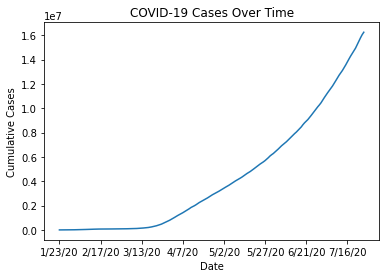

In [35]:
cases_df = pd.read_csv('time_series_covid19_confirmed_global.csv')

agg_func = dict.fromkeys(cases_df, 'sum')
agg_func['Lat'] = 'mean'
agg_func['Long'] = 'mean'
del agg_func['Province/State']
del agg_func['Country/Region']
cases_df = cases_df.groupby(cases_df['Country/Region']).aggregate(agg_func).reset_index()

cases_df = cases_df.append(cases_df.sum(numeric_only=True), ignore_index=True)
cases_df.iloc[-1, 0] = 'Total'
cases_df.iloc[-1, 1] = 0.0
cases_df.iloc[-1, 2] = 0.0

cases_df.iloc[-1, 4:].plot(kind='line')
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.show()

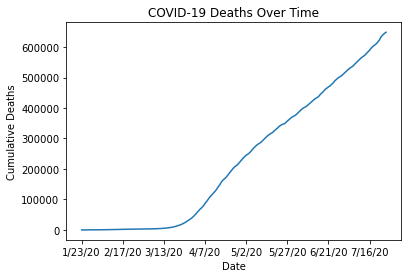

In [36]:
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')

agg_func = dict.fromkeys(deaths_df, 'sum')
agg_func['Lat'] = 'mean'
agg_func['Long'] = 'mean'
del agg_func['Province/State']
del agg_func['Country/Region']

deaths_df = deaths_df.groupby(deaths_df['Country/Region']).aggregate(agg_func).reset_index()

deaths_df = deaths_df.append(deaths_df.sum(numeric_only=True), ignore_index=True)
deaths_df.iloc[-1, 0] = 'Total'
deaths_df.iloc[-1, 1] = 0.0
deaths_df.iloc[-1, 2] = 0.0

deaths_df.iloc[-1, 4:].plot(kind='line')
plt.title('COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.show()

In [37]:
m = fl.Map(location=[30,0], zoom_start=2)

for i, row in cases_df.iterrows():
    circle = fl.Circle(
        location = [row['Lat'], row['Long']],
        popup = row['Country/Region'],
        radius = 100000,
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
    )
    
    circle.add_to(m)

m